<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/AdvML_L5S2_N1_Logistic_Regression_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

The following notebook introduces a logistic regression implementation with a sigmoid activation function.

In the following cell we have a sample implementation of Logistic Regression based on using Gradient Descent.

The implementation is capable of binary classification.




In [ ]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

## Multi-Class Classification using OvR based On Logistic Regression

The cell below switches to the scikit learn implementation of logistic regression.
It loads the MNIST dataset for all digits and returns a trained model lr.

In [ ]:
import numpy as np

def download_data():
    # Download and shuffle the dataset
    print("Downloading MNIST data set")
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8)
    print("MNIST data set downloaded")
    return mnist



def train_ovr_logReg(X, y, max_iter=10, C=2.0):
    print(f"Starting with model training with max_iter set to {max_iter} and C set to {C}.")
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(C=C, random_state=1, solver='lbfgs', multi_class='ovr', max_iter=max_iter)
    lr.fit(X, y)
    print("Finished with model training.")
    return lr

## Download the dataset
Execute the following cell in order to download and pre-process the dataset.

In [ ]:
mnist = download_data()
# the data comes ordered (first the 0s then the 1s, etc )
# we need to shuffle it before we train.
from sklearn.utils import shuffle
# We use the first 60K samples for training, the remaining 10K for testing.
X, y = shuffle(mnist.data[:60000], mnist.target[:60000])
print("MNIST data set shuffled")

# Logistic Regression might run into problems if we do not scale the data.
# We transform the grayscale values in the range 0-128 to the range 0-1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# We can fit the scaler on all of the data
scaler.fit(mnist.data)
X = scaler.fit_transform(X)
print("MNIST data set scaled")
print(f"Shape of X is {X.shape}")
print(f"Shape of y is {y.shape}")


MNIST data set downloaded
MNIST data set shuffled
MNIST data set scaled
Shape of X is (60000, 784)
Shape of y is (60000,)


## Execute the Training

You can set two hyperparameters:

* `max_iter`: Maximum iterations (`epochs`) for the training
* `C`: A hyperparameter that penalizes too complex models (where complex means the weights are too extreme). Smaller `C` are meant to reduce overfitting.  

In [ ]:
logReg_model = train_ovr_logReg(X, y, max_iter=500, C=2)
logReg_model.score(scaler.fit_transform(mnist.data[60000:]), mnist.target[60000:])

Starting with model training with max_iter set to 500 and C set to 2.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Finished with model training.


0.9193

 ## Drawing All Weight Vectors of the Trained Model

 The code below draws all weight vectors of the trained model by accessing the trained weight vectors of the`logReg_model`.
 The model as trained above is based on the One versus Rest approach, that means each weight vector represents the number versus the rest of the num

 * We use the draw_weight_vector method and its gridspace approach as basis
 * `shape[0]` of `logReg_model.coef_` gives you the number of trained vectors
 * individual vectors can then be accessed by `lr.coef_[0,:]` where `0` stands for the `0th` weight vector.
    
As you will see in the below code we only draw the positive values for the weights (called coefficients in the case of logistic regression).

A positive value for the logistic regression coefficients can be interpreted as:

* an increase in this value increases the probability for the targeted class (in our case a specific number)

Likewise a negative value can be interpreted as:

* an increase in this feature value increases the probability for the "all" class (as in One versus All).

<Figure size 432x288 with 0 Axes>

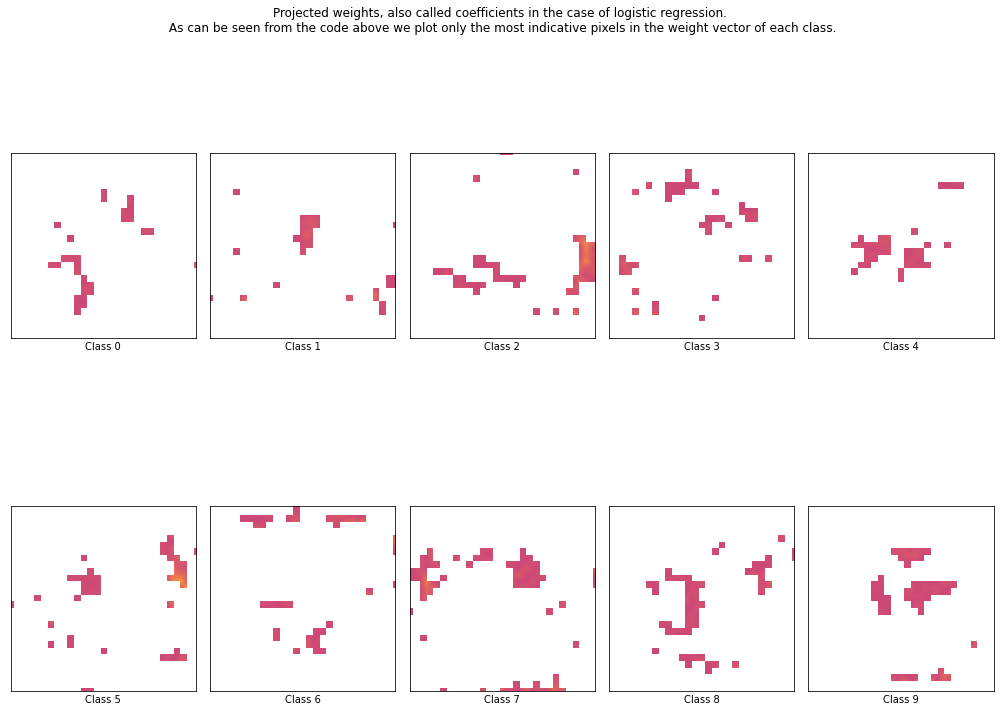

In [ ]:
%matplotlib inline

import numpy as np
from IPython.display import clear_output
from time import sleep
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.pylab as pl


cmap_rdbu = plt.get_cmap("RdBu")
plasma = plt.get_cmap("plasma")
gray = plt.get_cmap("gray")
cmap_rdbu.set_bad(color='white')

coef = logReg_model.coef_.copy()


plt.subplots_adjust(hspace=0.0001)
plt.figure(figsize=(14,12))
scale = np.abs(coef).max()
for i in range(10): # 0-9
     # 2x5 plot
    coef_plot = plt.subplot(2, 5, i + 1)
    # We plot only the positive coefficients (=weights). These are the weights that
    # are interpreted to be most indicative with the class.
    # the command in the next line sets all value < 0 to 0.
    transf_weight_vector = coef[i,:].clip(min=0)
    # We do some masking of values (do not show some pixels in the image we generate)
    transf_weight_vector = np.ma.masked_where((transf_weight_vector) < (np.max(transf_weight_vector)/512), transf_weight_vector)
    some_digit_image =  transf_weight_vector.reshape(28, 28)


    #coef_plot.axis("off")
    coef_plot.set_xticks(()); coef_plot.set_yticks(())
    coef_plot.set_xlabel(f'Class {i}')
    coef_plot.imshow(some_digit_image, plasma, vmin=-scale, vmax=scale,
                    interpolation='bilinear')

plt.tight_layout()
subtitle = ('Projected weights, also called coefficients in the case of logistic regression.\n As can be seen from the code above we plot only the most indicative pixels in the weight vector of each class.')
plt.suptitle(subtitle);

## Plotting the negative coefficients (weights indicating the `all` class.)

The code cell below plots the negative coefficients for our trained model.

<Figure size 432x288 with 0 Axes>

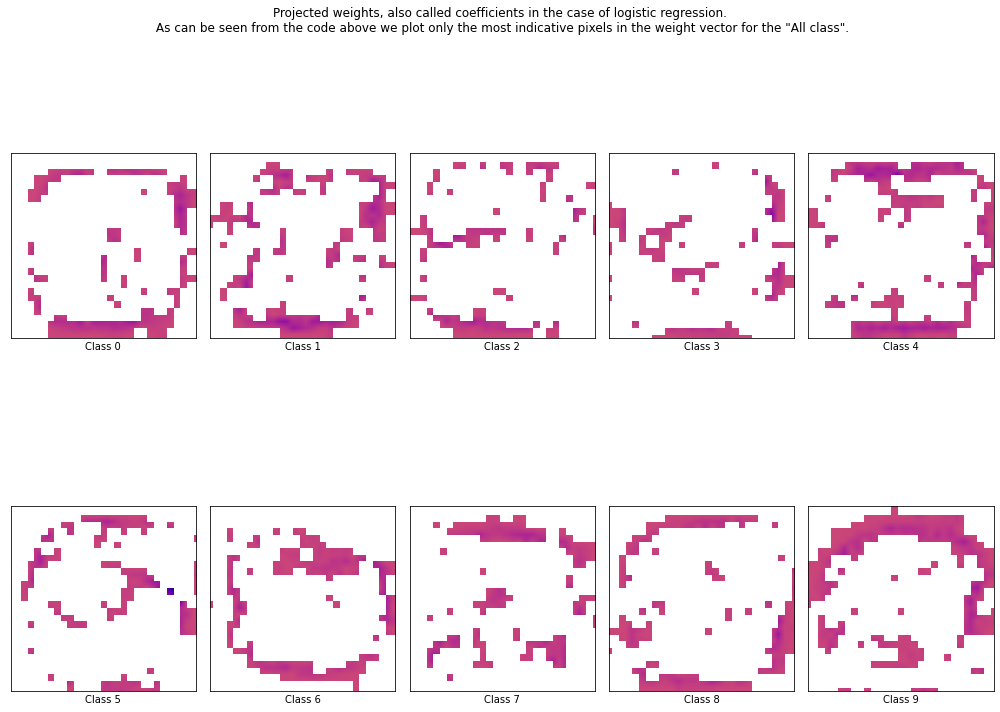

In [ ]:
coef = logReg_model.coef_.copy()


plt.subplots_adjust(hspace=0.0001)
plt.figure(figsize=(14,12))
scale = np.abs(coef).max()
for i in range(10): # 0-9
     # 2x5 plot
    coef_plot = plt.subplot(2, 5, i + 1)
    # We plot only the positive coefficients (=weights). These are the weights that
    # are interpreted to be most indicative with the class.
    # the command in the next line sets all value > 0 to 0.
    transf_weight_vector = coef[i,:].clip(max=0)
    # We do some masking of values (do not show some pixels in the image we generate)
    transf_weight_vector = np.ma.masked_where((transf_weight_vector) > (np.min(transf_weight_vector)/256), transf_weight_vector)
    some_digit_image =  transf_weight_vector.reshape(28, 28)


    #coef_plot.axis("off")
    coef_plot.set_xticks(()); coef_plot.set_yticks(())
    coef_plot.set_xlabel(f'Class {i}')
    coef_plot.imshow(some_digit_image, plasma, vmin=-scale, vmax=scale,
                    interpolation='bilinear')

plt.tight_layout()
subtitle = ('Projected weights, also called coefficients in the case of logistic regression.\n As can be seen from the code above we plot only the most indicative pixels in the weight vector for the "All class".')
plt.suptitle(subtitle);

## Exercise 1

### Test your intuition of model weakness

Test your intuition: Study the projected coefficients (weights) in the two graphs above.
<BR>
Specifically based on the positive coefficients in the first plot, what is your guess for the largest confusions in the model (i.e. misprediction of the model between two numbers, e.g. if the sample is a `1` but the model predicts a `0`.).
<BR>
Choose the three pairs you consider to be most confused by the model.
*
*
*

### Implement Confusion Matrix to Identify Confusion

Use the metrics package in scikit-learn in order to calculate a confusion matrix. Use the dedicated test part of the Mnist dataset (the last 10K samples) to calculate the confusion matrix.

`from sklearn import metrics`

`cm = metrics.confusion_matrix(y_true=y_test,
                         y_pred = predictions,
                        labels = logReg_model.classes_)`

For plotting I suggest to use `seaborn` and its `heatmap`.

Does the confusion matrix confirm your intuitions?

### Analyse Based on Visualisations & Confusion Matrix

Use the confusion matrix to revisit the plots, and to analyse the patterns in the positive and negative coefficients. Try to analyse it from the One versus All perspective.
Which are the numbers that most surprised you in terms of a lack of confusion?

The `job` of machine learning is to identify the features most aligned, most indicative with a certain class.
This however is only possible if there are discriminating feature value distributions between classes. In other words, if there is too much overlap, and not enough "unique" features for a class then the performance will suffer.

The most advanced models targeting MNIST can reach an accuracy of 99%+, but even these models are stuck with distinguishing some samples as shown by the following link:

https://github.com/cxy1997/MNIST-baselines/blob/master/figures/faults.png

When considering this, does the low amount of confusion for the numbers `1` and `0` for example make more sense?

It is important to keep this in the back of our minds when we attempt to solve a problem with machine learning: Do we have strong enough features that allow us to discriminate between classes?



